# Customer Churn Prediction Analysis Using Supervised Learning Approach

- Using Normalized Data
- SeleckKBEST Feature Selection Technique 
- Using SMOTE Technique to handle class imbalance
- Models: Logistic Regression, Random Forest and SVM Model
- Using ROC AUC Curve to evaluate the model's performance

## Define the Problem: 
First we will define the objectives of this analysis and the questions you want to answer using the data and understand the context and purpose of the analysis.
- The analysis is to develop predictive model to forecast churn in telecommunication businesses.

## Importing Necessary Liabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

#### 

## Importing Dataset

In [2]:
data = pd.read_csv('Customer Churn Dataset.csv')

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### 

## Data Cleaning and Preprocessing

In this section we will;
- Handle missing values: Identify and deal with missing data by imputation or removal.
- Remove duplicates (if any): Eliminate duplicate records if present in the dataset (if any)
- Standardize data formats: Ensure consistency in data formats and units.
- Feature engineering: Create new features or transform existing ones to better represent the data and improve model performance.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.size

147903

In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Handling Missing Data

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We noticed that Total Charges is represented as a categorical variable instead of numeric, the code below converts it to numeric variable

In [9]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [10]:
 data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

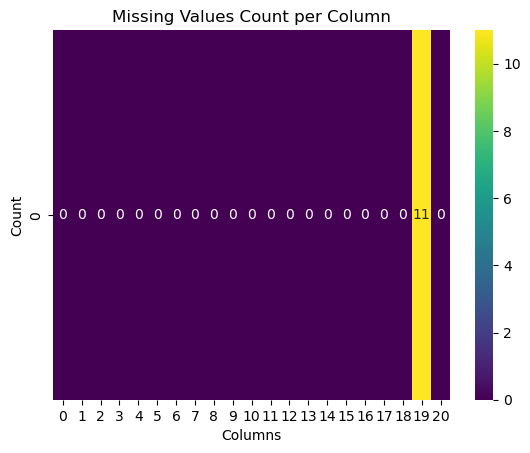

In [11]:
# Calculate the count of missing values in each column and convert it to a 2D array
missing_values_count = data.isna().sum().values.reshape(1, -1)

# Create a heatmap to visualize missing values count
sns.heatmap(missing_values_count, annot=True, cmap='viridis')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

#### Total Charges have 11 missing data. We will drop the enter columns

In [12]:
#Dropping the missing values in Total Charges column
data.dropna(subset=['TotalCharges'], inplace=True)

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.drop(['customerID'], axis=1, inplace=True)

In [15]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Checking for Duplicates

In [16]:
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate Rows:")
    print(duplicate_rows)

Duplicate Rows:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male              0      No         No       1       

In [17]:
#Descriptive Analysis
data.describe(include = 'all')

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7032    7032.000000    7032       7032  7032.000000         7032   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3549            NaN    3639       4933          NaN         6352   
mean      NaN       0.162400     NaN        NaN    32.421786          NaN   
std       NaN       0.368844     NaN        NaN    24.545260          NaN   
min       NaN       0.000000     NaN        NaN     1.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   
mean             NaN             NaN            NaN          NaN   
std              NaN             NaN            NaN          NaN   
min              NaN             NaN            NaN          NaN   
25%              NaN             NaN            NaN          NaN   
50%              NaN             NaN            NaN          NaN   
75%              NaN             NaN            NaN          NaN   
max              NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7032             7032              7032     7032.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4168              2365             NaN   
mean               NaN              NaN               NaN       64.798208   
std                NaN              NaN               NaN       30.085974   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.587500   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.862500   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7032.000000  7032  
unique           NaN     2  
top              NaN    No  
freq             NaN  5163  
mean     2283.300441   NaN  
std      2266.771362   NaN  
min        18.800000   NaN  
25%       401.450000   NaN  
50%      1397.475000   NaN  
75%      3794.737500   NaN  
max      8684.800000   NaN

#### Now let's converts Senior Citizen column from numeric to categorical labels of ("No" and "Yes") and display the first few rows of the dataframe with the updated values in the "SeniorCitizen" column.

In [18]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### 

## Exploratory Data Analysis (EDA):

- Here we will summarize and visualize the data using statistical measures, charts, and graphs.

In [19]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Visualizing the Distribution of Services

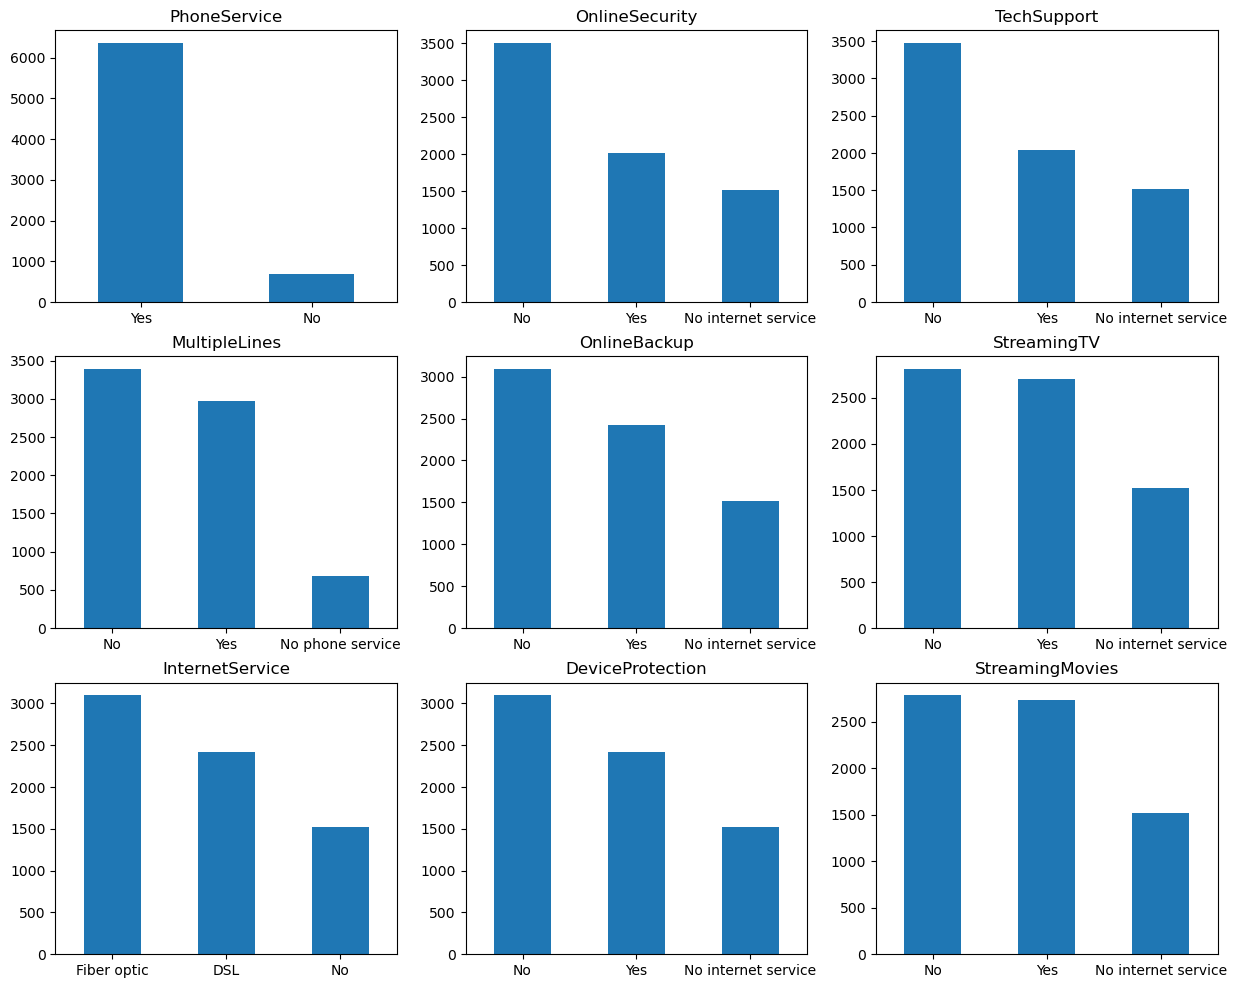

In [20]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#### Using Groupby

In [21]:
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

#### Overall Percentage and Count of Customers that Churned

In [22]:
#data['Churn'].value_counts()/100
percentage_counts = data['Churn'].value_counts(normalize=True) * 100
print(percentage_counts)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


In [23]:
 data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

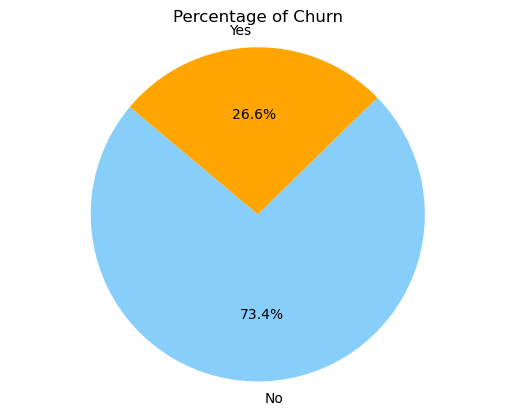

In [24]:
# Visualizing and Calculate percentage counts
percentage_counts = data['Churn'].value_counts(normalize=True) * 100

# Plotting
labels = percentage_counts.index
sizes = percentage_counts.values
colors = ['lightskyblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churn')
plt.axis('equal')
plt.show()

#### We can see there is a significant class imbalance between customers that churned and customers that didn't churn. In the coming steps we will be using the SMOTE technique an oversampling method to address the class imbalance as this imbalance can affect the model's performance.

### 

### Churn by Gender

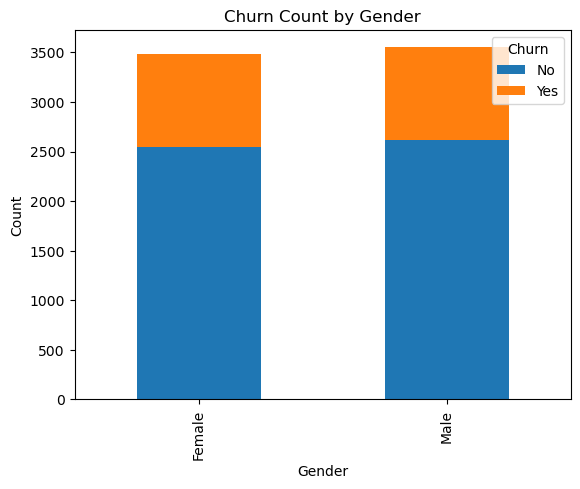

In [25]:
# Calculate the count of churned and non-churned customers by gender
churn_count = data.groupby(['gender', 'Churn']).size().unstack()

custom_palette = {"Male": "lightskyblue", "Female": "orange"}

# Plotting
churn_count.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()

### Female and Male have almost the same number of churn and non-churn customers

#### 

### Churn by Senior Citizen

#### Customer that are Senior Citizen who Churned

In [26]:
churn_counts = data[data['Churn'] == 'Yes'].groupby('SeniorCitizen').size()
print(churn_counts)

SeniorCitizen
No     1393
Yes     476
dtype: int64


The above shows that there are 1393 customers who are not senior citizens have churned and also 476 customers who are senior citizens and have churned.
In summary, this output tells you how many customers from each group have churned. It provides insight into the churn behavior based on the 'SeniorCitizen' status.

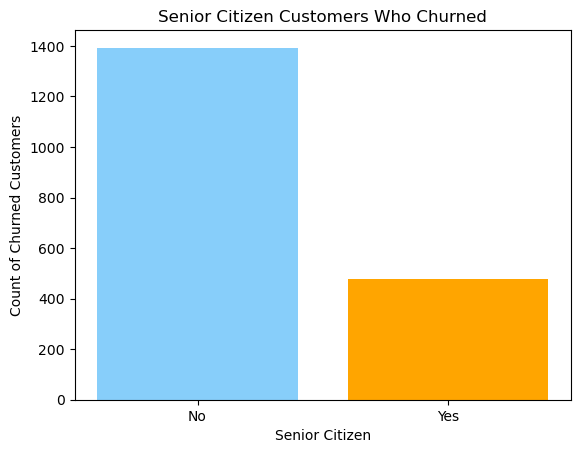

In [27]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('Senior Citizen')
plt.ylabel('Count of Churned Customers')
plt.title('Senior Citizen Customers Who Churned')
plt.xticks(churn_counts.index, ['No', 'Yes'])  # Set the x-ticks labels
plt.show()

#### Customer that are Senior Citizen who did not Churn

In [28]:
churn_counts = data[data['Churn'] == 'No'].groupby('SeniorCitizen').size()
print(churn_counts)

SeniorCitizen
No     4497
Yes     666
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

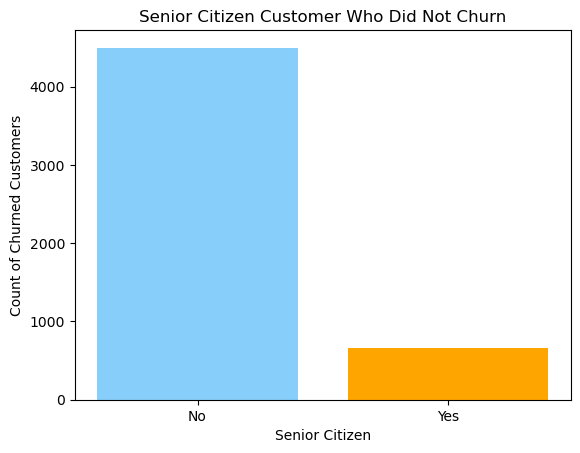

In [29]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('Senior Citizen')
plt.ylabel('Count of Churned Customers')
plt.title('Senior Citizen Customer Who Did Not Churn')
plt.xticks

### 

### Churn by Internet Service Customers

#### Internet Service Customers who Churned

In [30]:
churn_count = data[data['Churn'] == 'Yes'].groupby(['InternetService']).size()
print(churn_count)

InternetService
DSL             459
Fiber optic    1297
No              113
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

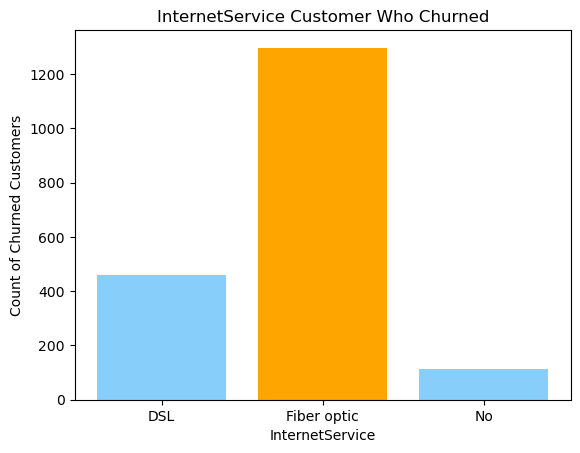

In [31]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_count.index, churn_count.values, color=colors)
plt.xlabel('InternetService')
plt.ylabel('Count of Churned Customers')
plt.title('InternetService Customer Who Churned')
plt.xticks

#### Internet Service Customers who did not Churned

In [32]:
churn_count = data[data['Churn'] == 'No'].groupby(['InternetService']).size()
print(churn_count)

InternetService
DSL            1957
Fiber optic    1799
No             1407
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

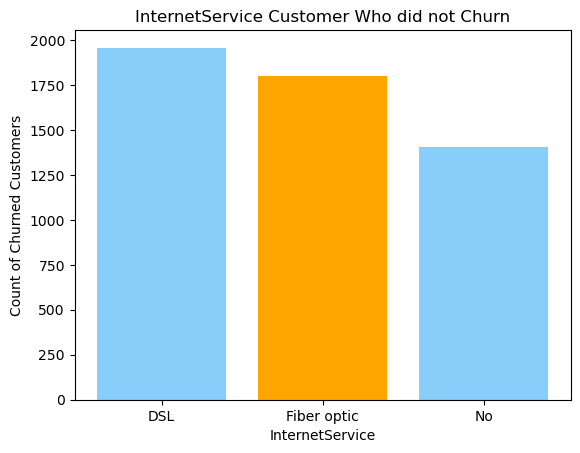

In [33]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_count.index, churn_count.values, color=colors)
plt.xlabel('InternetService')
plt.ylabel('Count of Churned Customers')
plt.title('InternetService Customer Who did not Churn')
plt.xticks

#### 

### Churn by MultipleLines

#### MultipleLines Customers who Churned

In [34]:
churn_counts = data[data['Churn'] == 'Yes'].groupby(['MultipleLines']).size()
print(churn_counts)

MultipleLines
No                  849
No phone service    170
Yes                 850
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

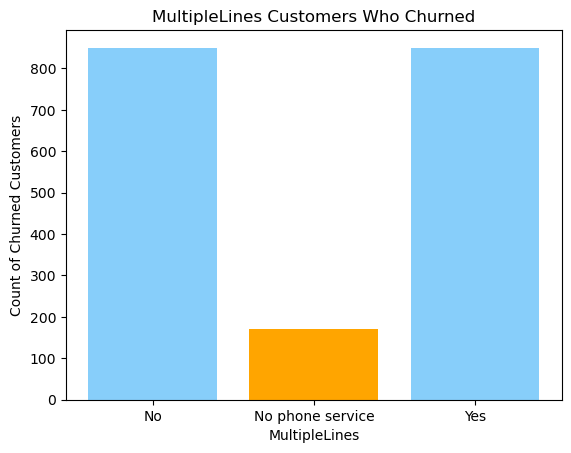

In [35]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('MultipleLines')
plt.ylabel('Count of Churned Customers')
plt.title('MultipleLines Customers Who Churned')
plt.xticks

#### MultipleLine Customers who did not Churn

In [36]:
churn_counts = data[data['Churn'] == 'No'].groupby(['MultipleLines']).size()
print(churn_counts)

MultipleLines
No                  2536
No phone service     510
Yes                 2117
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

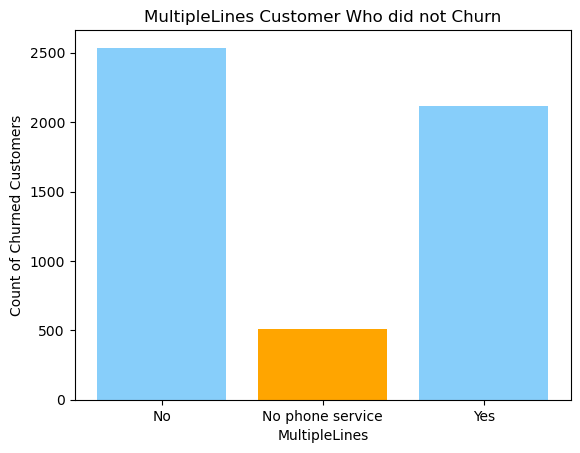

In [37]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('MultipleLines')
plt.ylabel('Count of Churned Customers')
plt.title('MultipleLines Customer Who did not Churn')
plt.xticks

#### 

### Churn by Contract Type

#### Contract Type by Customer who Churned

In [38]:
#Customers who Churned
churn_counts = data[data['Churn'] == 'Yes'].groupby(['Contract']).size()
print(churn_counts)

Contract
Month-to-month    1655
One year           166
Two year            48
dtype: int64


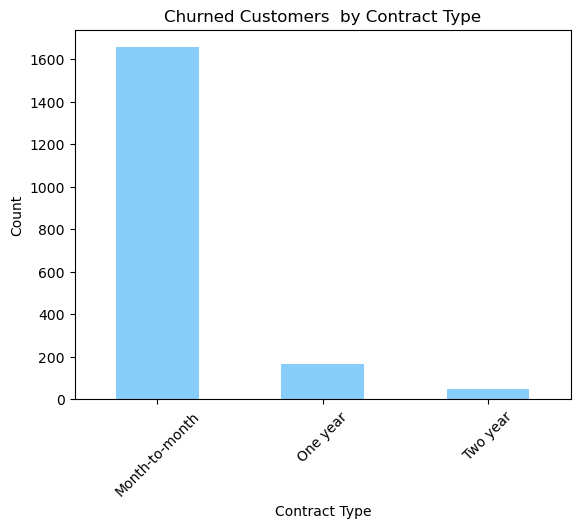

In [39]:
churn_counts = data[data['Churn'] == 'Yes'].groupby(['Contract']).size()

# Plotting
churn_counts.plot(kind='bar', color='lightskyblue')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churned Customers  by Contract Type')
plt.xticks(rotation=45)
plt.show()

#### Contract Type by Customer who did not Churn

In [40]:
#Customers who did not Churn
churn_counts = data[data['Churn'] == 'No'].groupby(['Contract']).size()
print(churn_counts)

Contract
Month-to-month    2220
One year          1306
Two year          1637
dtype: int64


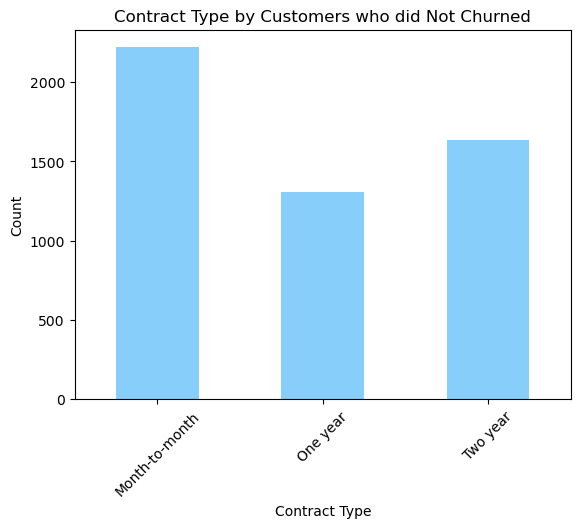

In [41]:
churn_counts = data[data['Churn'] == 'No'].groupby(['Contract']).size()

# Plotting
churn_counts.plot(kind='bar', color='lightskyblue')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Contract Type by Customers who did Not Churned')
plt.xticks(rotation=45)
plt.show()

### Summary of the Contract Type

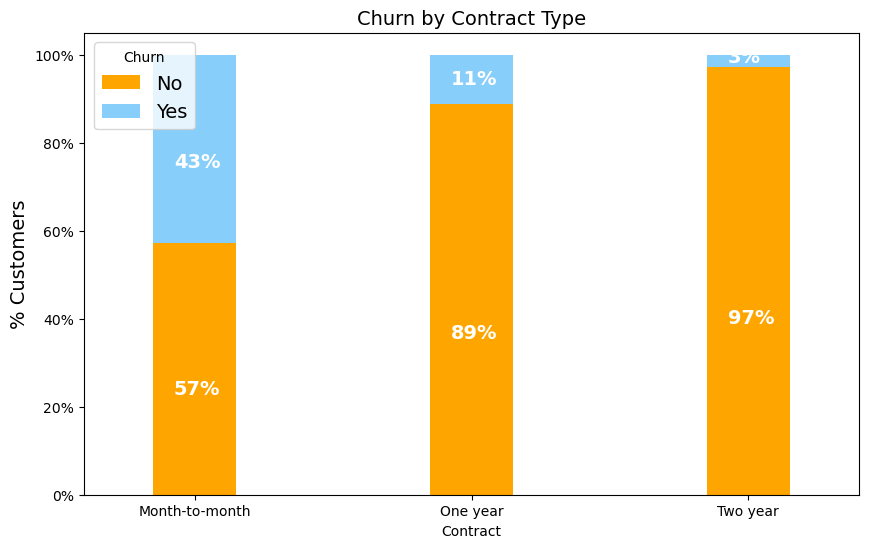

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['orange', 'lightskyblue']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                               width=0.3,
                                                               stacked=True,
                                                               rot=0,
                                                               figsize=(10,6),
                                                               color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()

#### 

### Distribution of Monthly Charges by Churn

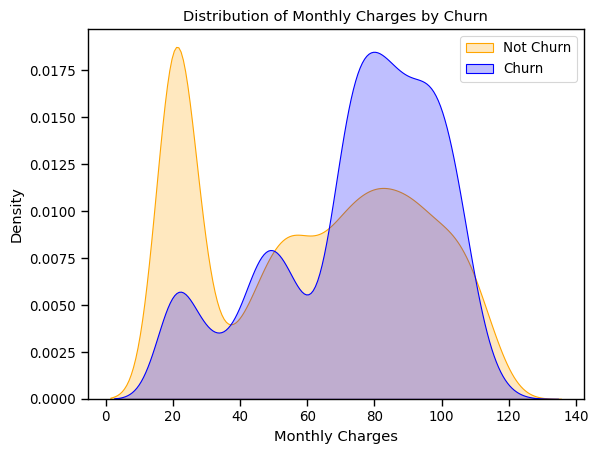

In [43]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="orange", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by Churn');

#### 

### Distribution of Total Charges by Churn

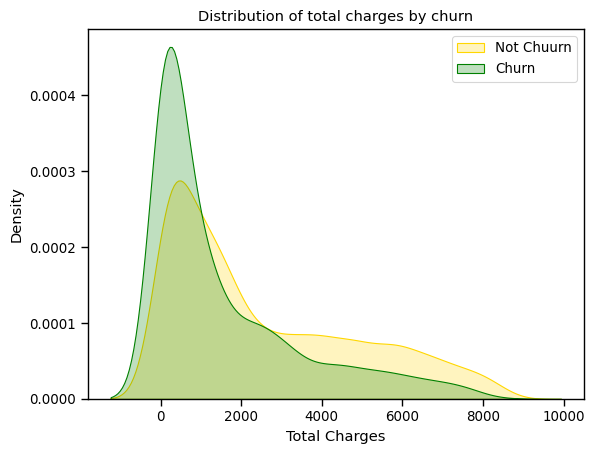

In [44]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

#### 

### Tenure Vs Churn

In [45]:
# Create the box plot
fig = px.box(data, x='Churn', y='tenure')

# Update y-axis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update x-axis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'),
                  title='<b>Tenure vs Churn</b>')

fig.show()

#### The above shows that majority of new customers are likely to churn than old customer

#### 

### Data Pre-processing

Here we;
- Further explored the relationships between variables and identified patterns or trends.
- Performed feature engineering by creating new features/columns and transforming existing ones to better represent the data and improve model performance.
- Utilised encoding techniques like Label Encoder and One Hot Encoder.
- Performed Normalization using Min Max Scaler
- Performed Feature Selection for dimensionality reduction using “Recursive Feature Elimination (RFE)” to reduce complexity and improve model performance.

#### Let's start with MultipleLines that has 3 observations and transform the "No Phone Service" to No as it also presents customers with no MultipleLines.

In [46]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data['MultipleLines'].value_counts()

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

#### We will do the same for Online Security, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies

In [47]:
# Create a list for the columns to replace
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' in all specified columns with 'No'
data[columns_to_replace] = data[columns_to_replace].replace('No internet service', 'No')

# Check value counts for all specified columns after replacement
value_counts_all = data[columns_to_replace].apply(pd.value_counts)

# Print the value counts for all specified columns
print(value_counts_all)

     OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
No             5017          4607              4614         4992         4329   
Yes            2015          2425              2418         2040         2703   

     StreamingMovies  
No              4301  
Yes             2731  


#### 

### Label Encoding

#### Here we will perform Label Encoding to transform categorical columns with 2 observations to 0 and 1 
#### And use One Hot Encoder for columns with more than 2 observations

In [48]:
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0  Female            No     Yes         No       1           No            No   
1    Male            No      No         No      34          Yes            No   
2    Male            No      No         No       2          Yes            No   
3    Male            No      No         No      45           No            No   
4  Female            No      No         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes

### We will exclude Columns 'Internet Service, Contract, Payment Method, Monthly Charges and Total Charges' we will treat them after as 'Internet Service, Contract, and Payment Method' have more than 2 outputs and Monthly Charges and Total Charges are already in numeric form

In [49]:
# Get all column names
all_columns = data.columns

# Exclude the columns (Internet Service, Contract, Payment Method, Monthly Charges and Total Charges)
columns_to_exclude = ['InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges' 'TotalCharges']

# Get the columns to encode by removing the excluded columns from all columns
columns_to_encode = [col for col in all_columns if col not in columns_to_exclude]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
data[columns_to_encode] = data[columns_to_encode].apply(label_encoder.fit_transform)


In [50]:
data.dtypes

gender               int32
SeniorCitizen        int32
Partner              int32
Dependents           int32
tenure               int64
PhoneService         int32
MultipleLines        int32
InternetService     object
OnlineSecurity       int32
OnlineBackup         int32
DeviceProtection     int32
TechSupport          int32
StreamingTV          int32
StreamingMovies      int32
Contract            object
PaperlessBilling     int32
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int64
Churn                int32
dtype: object

#### 

### Using One Hot Encoder
Now let's convert Internet Service, Contract, and Payment Method to numeric using One Hot Encoder

In [51]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [52]:
#Let's view the data to ensure the columns have been coverted accordingly
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       0             0   
1       1              0        0           0      33             1   
2       1              0        0           0       1             1   
3       1              0        0           0      44             0   
4       0              0        0           0       1             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

In [53]:
data.dtypes

gender                                     int32
SeniorCitizen                              int32
Partner                                    int32
Dependents                                 int32
tenure                                     int64
PhoneService                               int32
MultipleLines                              int32
OnlineSecurity                             int32
OnlineBackup                               int32
DeviceProtection                           int32
TechSupport                                int32
StreamingTV                                int32
StreamingMovies                            int32
PaperlessBilling                           int32
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int32
InternetService_DSL                        uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_Month-to-mo

In [54]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       0             0   
1       1              0        0           0      33             1   
2       1              0        0           0       1             1   
3       1              0        0           0      44             0   
4       0              0        0           0       1             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

In [55]:
data.shape

(7032, 27)

### Correlation Analysis

In [56]:
# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data.corr()['Churn'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_churn)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
PaperlessBilling                           0.191454
MonthlyCharges                             0.182989
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
PhoneService                               0.011691
gender                                    -0.008545
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Dependents  

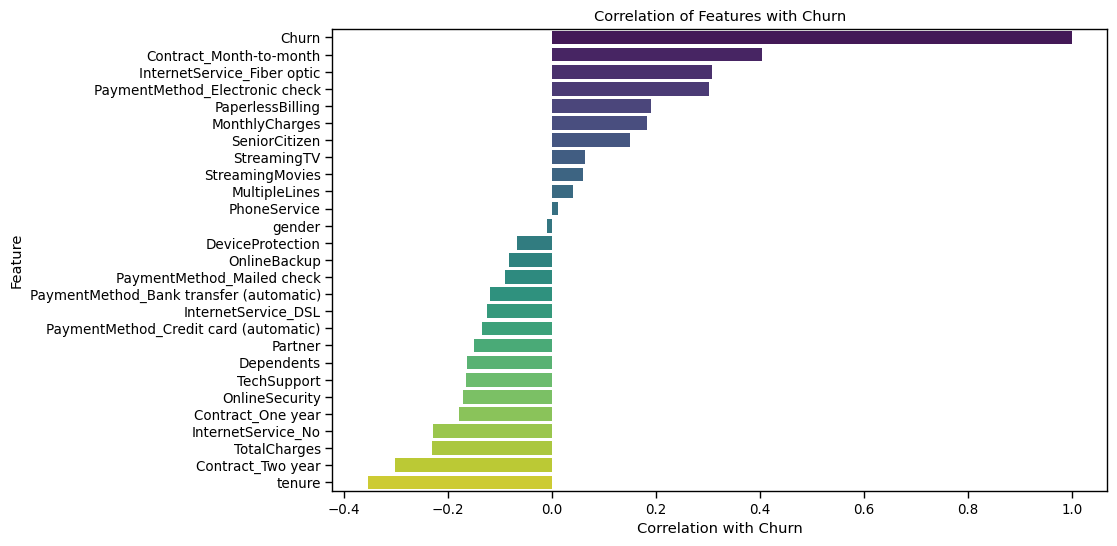

In [57]:
# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')
plt.xlabel('Correlation with Churn')
plt.ylabel('Feature')
plt.title('Correlation of Features with Churn')
plt.show()

#### From the above we can see that there is no perfect correlation with the target variable

####  

### Feature Selection Using SelectKBest 

Since we have 26 columns with no perfect correlation to the target variable we will be using a feature selection techniques to identify the most relevant variables for building the model. This would helps to improve the model performance, reduce overfitting, and enhance interpretability. 
For this we will be using 'SelectKBest' Mutual Information based feature selection to help identify important features. It selects the top k features with the highest mutual information scores, indicating the strength of association between each feature and the target.

#### 

## Model Building and Evaluation.

- Choose appropriate statistical or machine learning models based on the problem and data characteristics.
- Split the data into training and testing sets for model evaluation.
- Train the models on the training data and evaluate their performance using appropriate metrics.
- Fine-tune model parameters and compare different models to select the best-performing one.
- Iterate and Refine Review the analysis process and results, and iterate as needed to refine the analysis or address new questions or insights.

### Splitting the Data into Training and Testing

In [58]:
X = data.drop('Churn', axis = 1)

y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 

### Normalizing the Data Using MinMaxScaler

We will apply normalization technique on the dataset because the dataset columns are of  different scale. Here we will using the Min Max Scaler to normalize the dataset.

In [59]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [60]:
# Fit the scaler to your training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# Now X_train_normalized and X_test_normalized contain the normalized data

#### 

### Selecting the Model
Here we will be using 4 models 
- Logistic Regression Model
- Random Forest Classifier
- Support Vector Machine Classifier

After which we will select the best fit model

### Models

In [61]:
#Initializing Models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm_model = SVC(probability=True)

### 

## EXPERIMENT 1

### Using All the Features without SelectKBest

First let's build our model using all the features after which we will use the SelectKBest on top 10 and 20

### Logistic Regression

In [62]:
# Train and evaluate Logistic Regression model on normalized data
logistic_regression.fit(X_train_normalized, y_train)
y_pred_lr_normalized = logistic_regression.predict(X_test_normalized)
accuracy_lr_normalized = accuracy_score(y_test, y_pred_lr_normalized)
conf_matrix_lr_normalized = confusion_matrix(y_test, y_pred_lr_normalized)

# Make predictions on the train set
y_pred_train_lr_normalized = logistic_regression.predict(X_train_normalized)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr_normalized = accuracy_score(y_train, y_pred_train_lr_normalized)
print("Logistic Regression Accuracy on the train set (Normalized Data):", train_accuracy_lr_normalized)

# Print the accuracy of the test set for Logistic Regression model
print("Logistic Regression Accuracy (Normalized Data - Test Set):", accuracy_lr_normalized)
print("Logistic Regression Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_lr_normalized))
print("Logistic Regression Confusion Matrix (Normalized Data):")
print(conf_matrix_lr_normalized)

Logistic Regression Accuracy on the train set (Normalized Data): 0.8117333333333333
Logistic Regression Accuracy (Normalized Data - Test Set): 0.7924662402274343
Logistic Regression Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Logistic Regression Confusion Matrix (Normalized Data):
[[936  97]
 [195 179]]


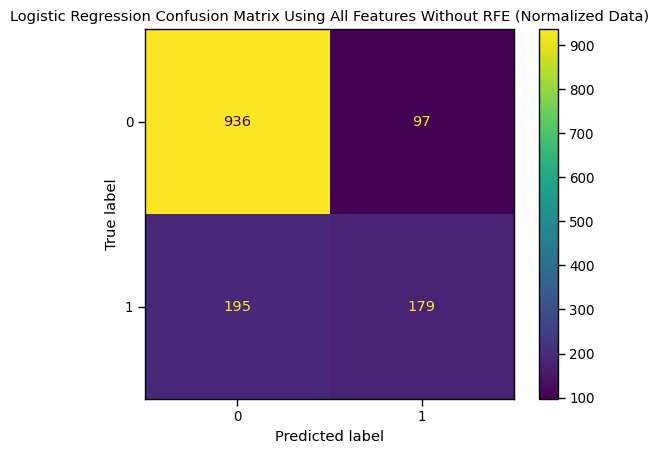

In [63]:
# Plotting the Confusion Matrix for Logistic Regression Model with Normalized Data
cm_display_lr_normalized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr_normalized)
cm_display_lr_normalized.plot()
plt.title("Logistic Regression Confusion Matrix Using All Features Without RFE (Normalized Data)")
plt.show()

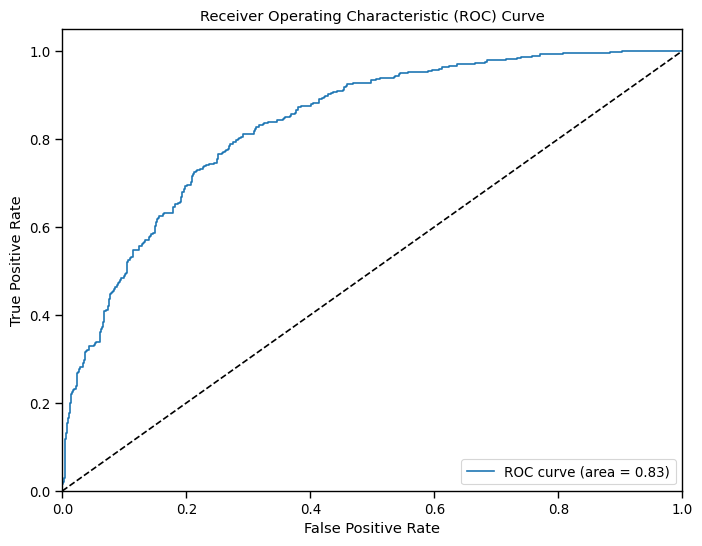

In [64]:
# Plotting the ROC curve for Logistic Regression Model with Normalized Data
y_prob_lr_normalized = logistic_regression.predict_proba(X_test_normalized)[:, 1]
fpr_lr_normalized, tpr_lr_normalized, thresholds_lr_normalized = roc_curve(y_test, y_prob_lr_normalized)
auc_lr_normalized = roc_auc_score(y_test, y_prob_lr_normalized)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_normalized, tpr_lr_normalized, label='ROC curve (area = %0.2f)' % auc_lr_normalized)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 

### SVM Model

In [65]:
# Train the SVM model on normalized data without RFE
svm_model.fit(X_train_normalized, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_normalized)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_normalized)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print("SVM Accuracy on the train set (Normalized Data without RFE):", train_accuracy_svm)

# Evaluate the model
print("Scenario: Normalized data without RFE")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

SVM Accuracy on the train set (Normalized Data without RFE): 0.8241777777777778
Scenario: Normalized data without RFE
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Confusion Matrix:
[[923 110]
 [193 181]]


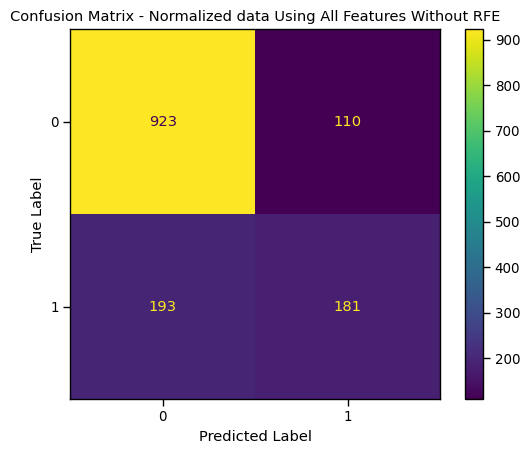

In [66]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Normalized data Using All Features Without RFE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC: 0.7910685351320849


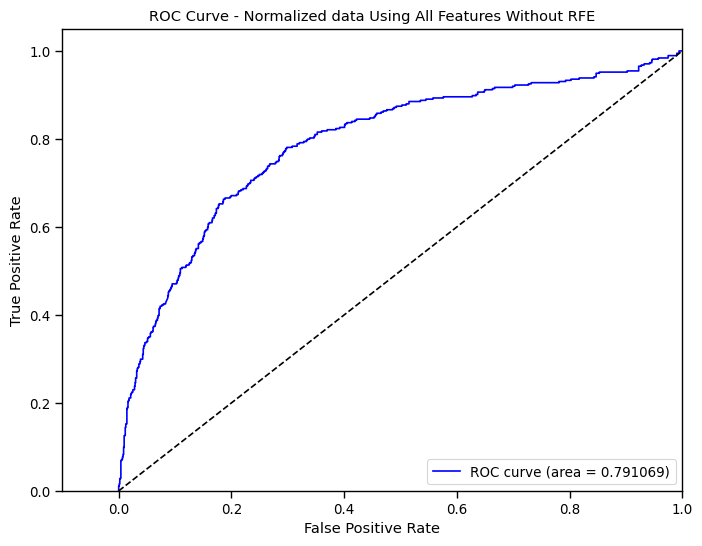

In [67]:
# Compute the probability estimates for positive class
y_prob = svm_model.predict_proba(X_test_normalized)[:, 1]

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve - Normalized data Using All Features Without RFE')
plt.show()

### 

### Random Forest Model

In [68]:
# Train and evaluate Random Forest model on normalized data
random_forest.fit(X_train_normalized, y_train)
y_pred_rf = random_forest.predict(X_test_normalized)

# Compute confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_normalized)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Accuracy on the train set (Normalized Data):", train_accuracy_rf)

# Print accuracy, classification report, and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_rf)
print("Random Forest Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix (Normalized Data):")
print(conf_matrix_rf)

Random Forest Accuracy on the train set (Normalized Data): 0.9976888888888888
Random Forest Accuracy (Normalized Data - Test Set): 0.7803837953091685
Random Forest Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Random Forest Confusion Matrix (Normalized Data):
[[917 116]
 [193 181]]


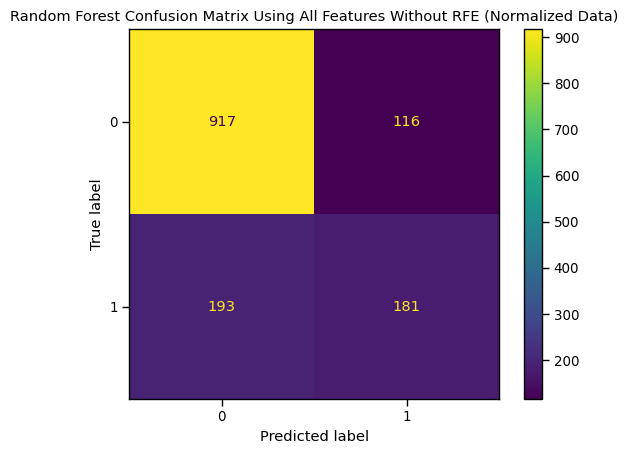

In [69]:
# Plotting the Confusion Matrix for Random Forest Model with Normalized Data
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Random Forest Confusion Matrix Using All Features Without RFE (Normalized Data)")
plt.show()

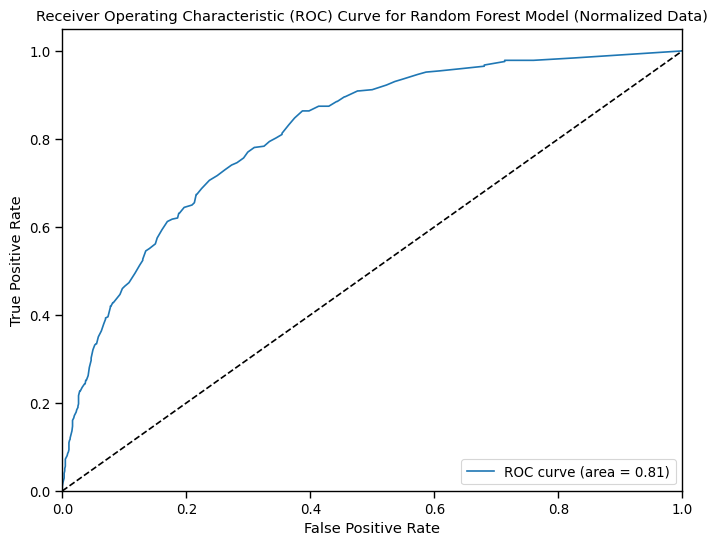

In [70]:
# Plotting the ROC curve for Random Forest Model with Normalized Data
y_prob_rf = random_forest.predict_proba(X_test_normalized)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model (Normalized Data)')
plt.legend(loc="lower right")
plt.show()

#### 

## EXPERIMENT 2

### Using SeleckKBest on Top 10 Features

In [71]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression

In [72]:
# Initialize Logistic Regression model

# Fit Logistic Regression model on the top 10 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
print("Logistic Regression Accuracy on the train set with top 10 features:", train_accuracy_lr)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy on the train set with top 10 features: 0.7980444444444444
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



<Figure size 640x480 with 0 Axes>

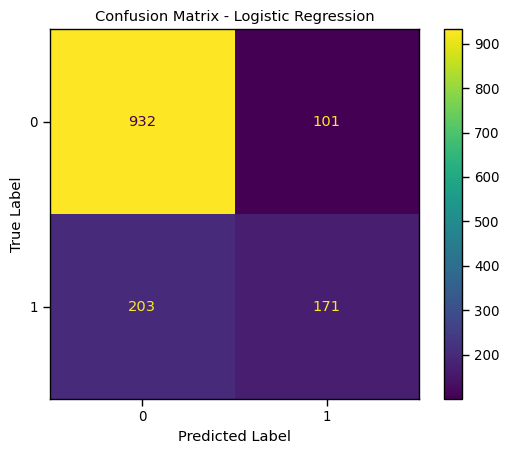

In [73]:
# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

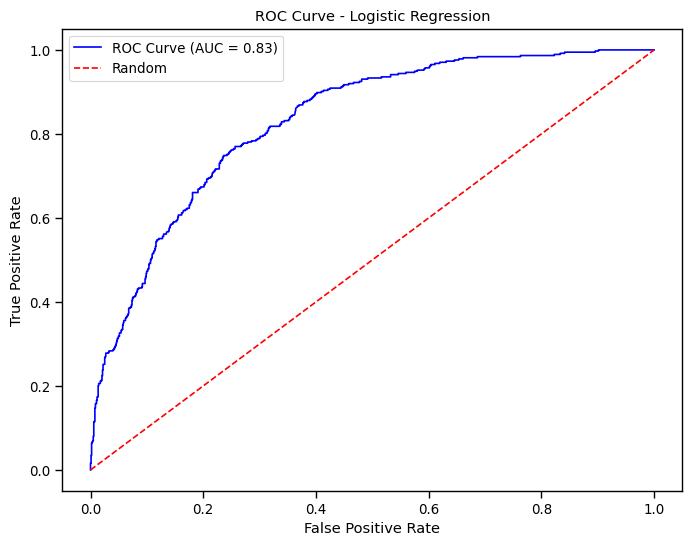

In [74]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 

### SVM Model

In [75]:
# Fit SVM model on the top 10 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print("SVM Accuracy on the train set with top 10 features:", train_accuracy_svm)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy on the train set with top 10 features: 0.8
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



<Figure size 640x480 with 0 Axes>

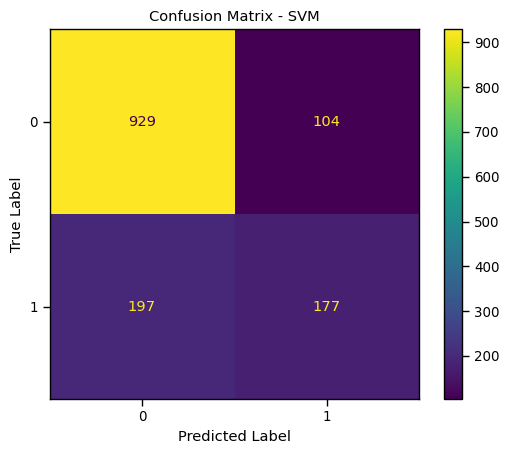

In [76]:
# Calculate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

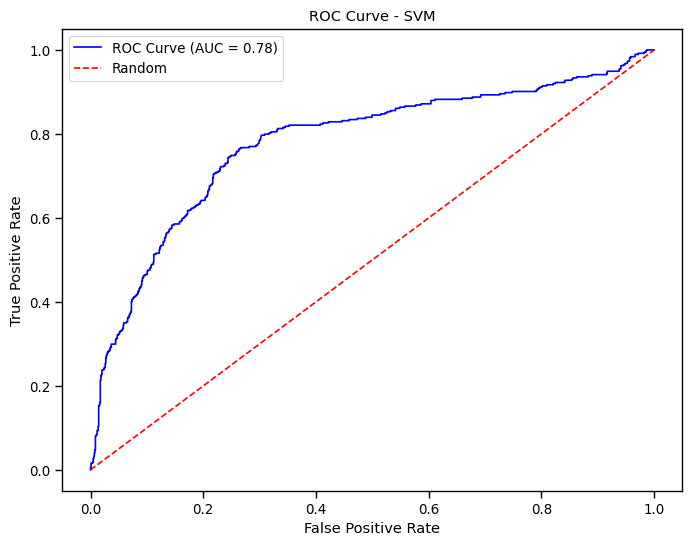

In [77]:
# Calculate decision function scores
y_score_svm = svm_model.decision_function(X_test_k_best)

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### Random Forest Model

In [78]:
# Fit Random Forest model on the top 10 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Accuracy on the train set with top 10 features:", train_accuracy_rf)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on the train set with top 10 features: 0.9937777777777778
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.56      0.46      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



<Figure size 640x480 with 0 Axes>

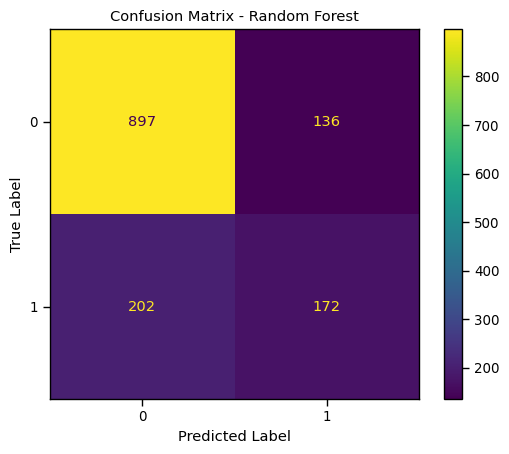

In [79]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

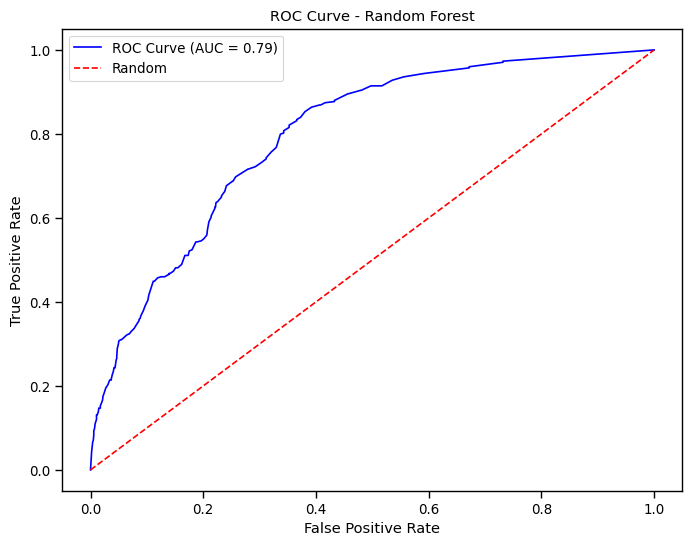

In [80]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### 

#### 

## EXPERIMENT 3

### PERFORMING SELECTKBEST ON TOP TWENTY (20) FEATURES

#### Logistic Regression, SVM Model and Random Forest Using 20 Top features

In [81]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=20)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression Model

In [82]:
# Initialize Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Fit Logistic Regression model on the top 20 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
print("Logistic Regression Accuracy on the train set with top 20 features:", train_accuracy_lr)


# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy on the train set with top 20 features: 0.8055111111111111
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



<Figure size 640x480 with 0 Axes>

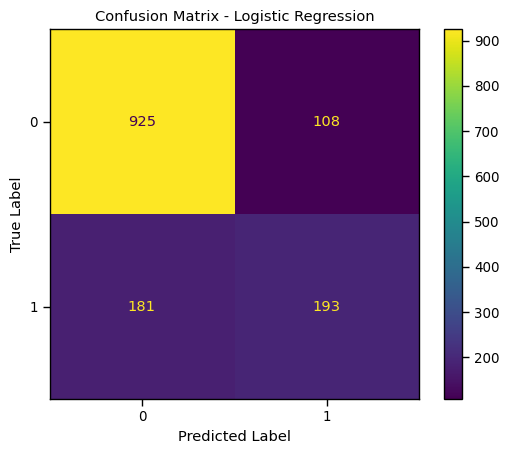

In [83]:
# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

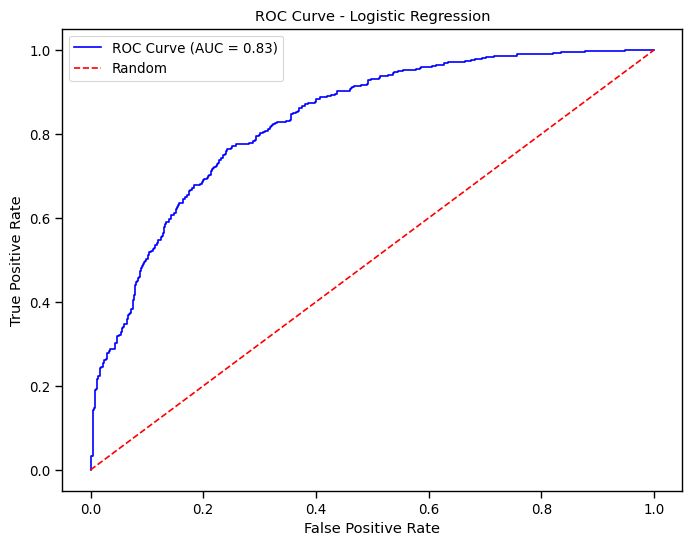

In [84]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

#### 

### 

### SVM Model

In [85]:
#Initialize the Model
svm_model = SVC(probability=True)

# Fit SVM model on the top 20 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print("SVM Accuracy on the train set with top 20 features:", train_accuracy_svm)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy on the train set with top 20 features: 0.8131555555555555
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



<Figure size 640x480 with 0 Axes>

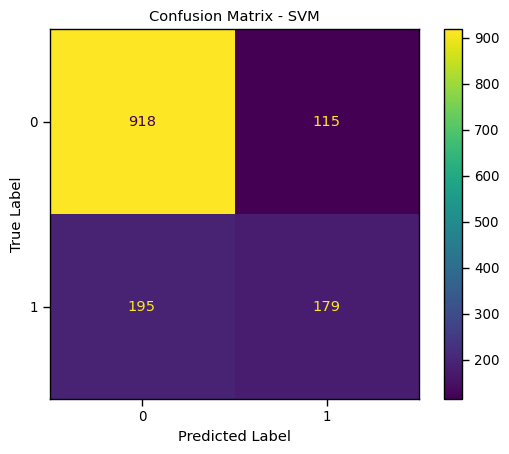

In [86]:
# Calculate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

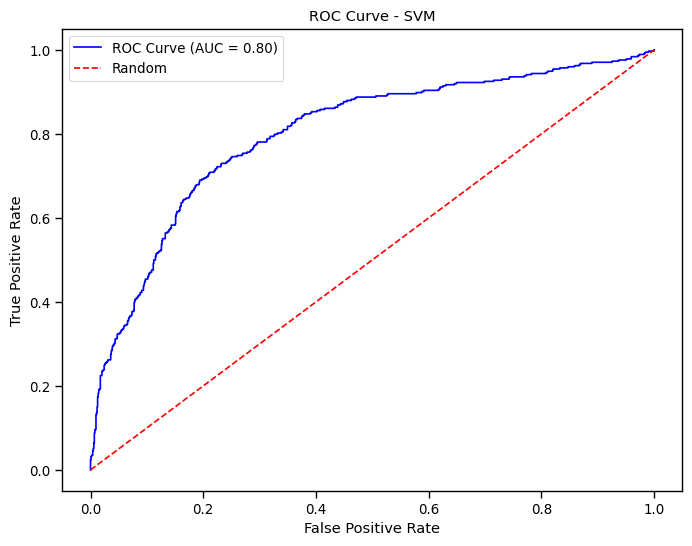

In [87]:
# Get probability estimates
y_prob_svm = svm_model.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### 

### Random Forest Model

In [88]:
#Initialize Models
random_forest = RandomForestClassifier()### Random Forest Model

# Fit Random Forest model on the top 20 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Accuracy on the train set with top 20 features:", train_accuracy_rf)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on the train set with top 20 features: 0.9973333333333333
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



<Figure size 640x480 with 0 Axes>

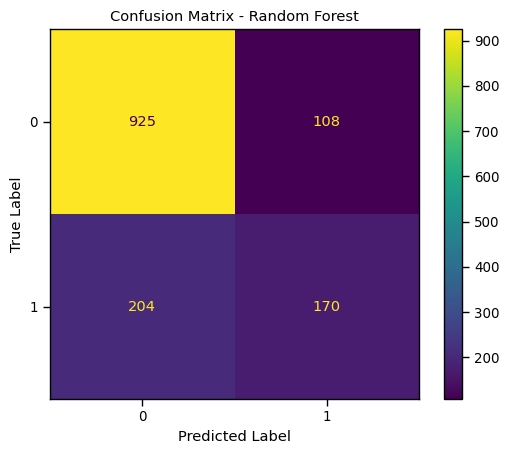

In [89]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

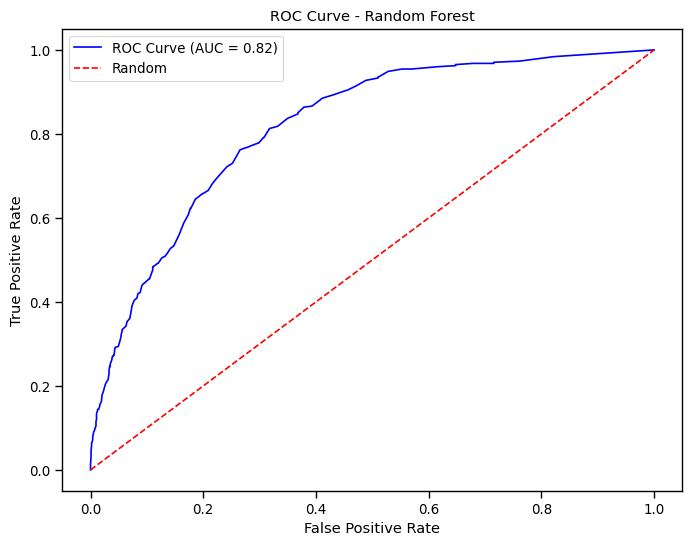

In [90]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

#### 

### 

## EXPERIMENT 4

### Using SMOTE Technique with SelectKBest On TOP 10 Features
Earlier we discovered that there is a class imbalance in the target variable we will be using the SMOTE technique to address this class imabalance and compare results with other models done.

In [91]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=10)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.transform(X_test_normalized)

### 

### Logistic Regression Model

In [92]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
logistic_regression.fit(X_train_k_best, y_train_smote)
y_pred_lr = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr = accuracy_score(y_train_smote, y_pred_train_lr)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.7671912832929783
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



<Figure size 640x480 with 0 Axes>

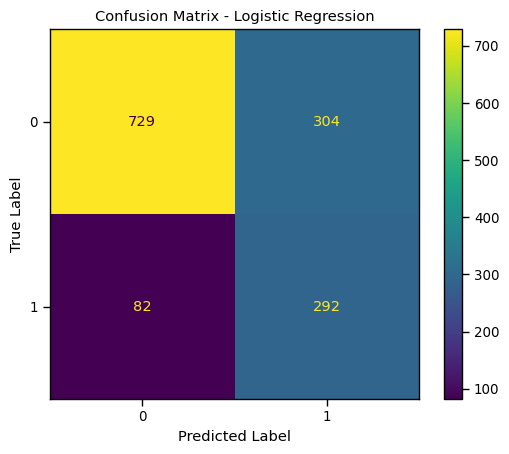

In [93]:
# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

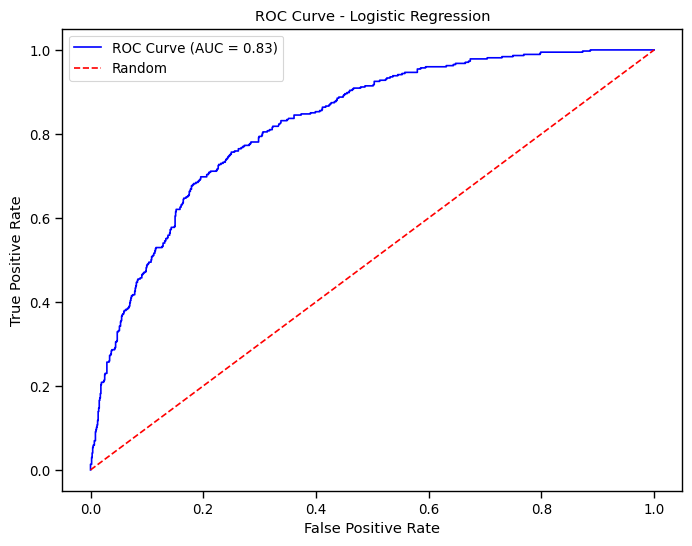

In [94]:
# Calculate ROC AUC
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

#### 

### 

### Random Forest Model

In [95]:
random_forest = RandomForestClassifier()

# Train and evaluate Random Forest model
random_forest.fit(X_train_k_best, y_train_smote)
y_pred_rf = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train_smote, y_pred_train_rf)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.9963680387409201
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.53      0.55      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



<Figure size 640x480 with 0 Axes>

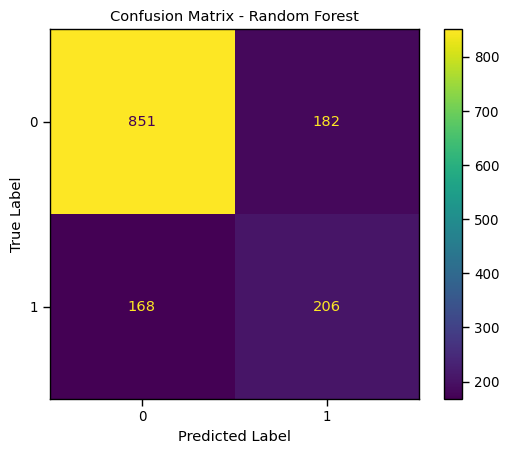

In [96]:
# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

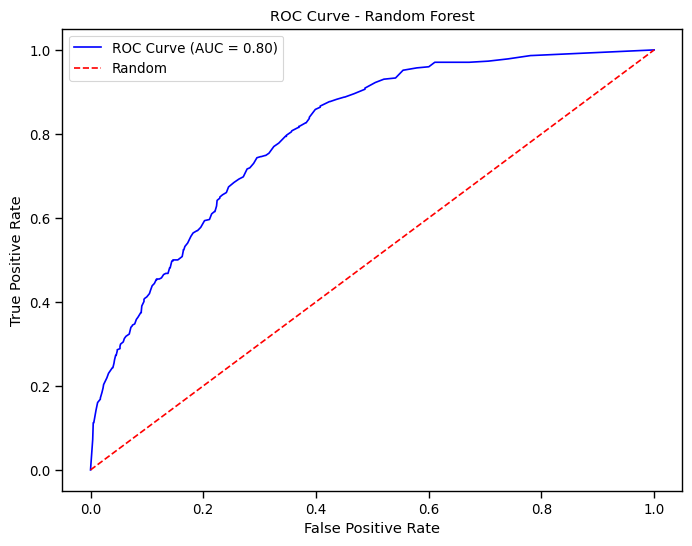

In [97]:
# Calculate ROC AUC
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

#### 

#### 

### SVM Model

In [98]:
svm_model = SVC()

# Train and evaluate SVM model
svm_model.fit(X_train_k_best, y_train_smote)
y_pred_svm = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train_smote, y_pred_train_svm)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm)


print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy on the train set with SMOTE data and top features: 0.7961259079903148
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



<Figure size 640x480 with 0 Axes>

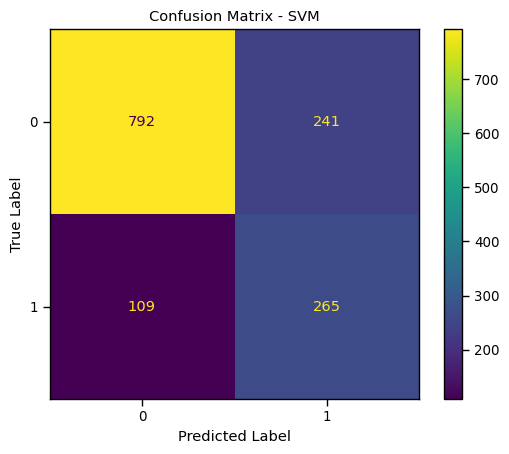

In [99]:
# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

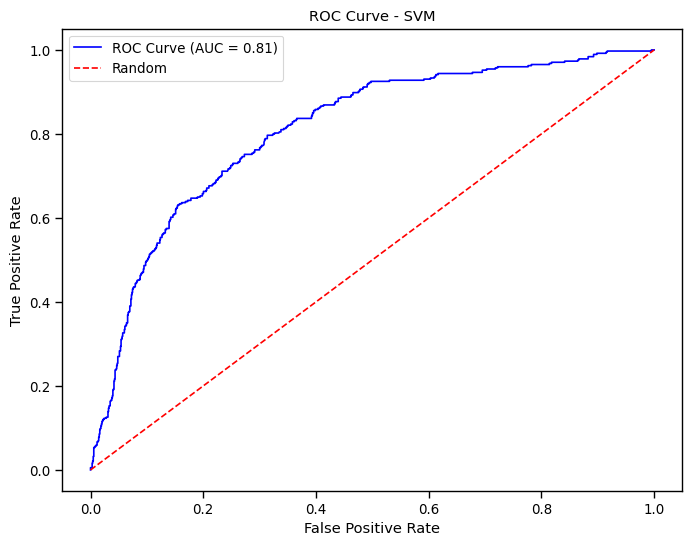

In [100]:
# Calculate ROC AUC
# Note: SVM does not have predict_proba method, so we'll use decision_function instead
y_score_svm = svm_model.decision_function(X_test_k_best)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

#### 

### 

### 

## EXPERIMENT 5

### Using SMOTE Technique On SelectKBest TOP 20 Features

In [101]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=20)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.transform(X_test_normalized)

### Logistic Regression Model

In [102]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
logistic_regression.fit(X_train_k_best, y_train_smote)
y_pred_lr = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr = accuracy_score(y_train_smote, y_pred_train_lr)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.774455205811138
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.75      0.76      1407



<Figure size 640x480 with 0 Axes>

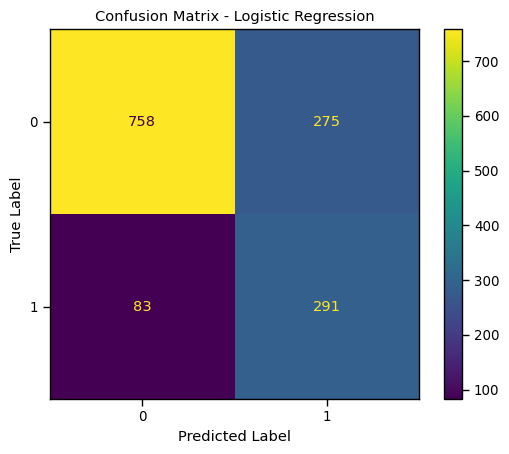

In [103]:
# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

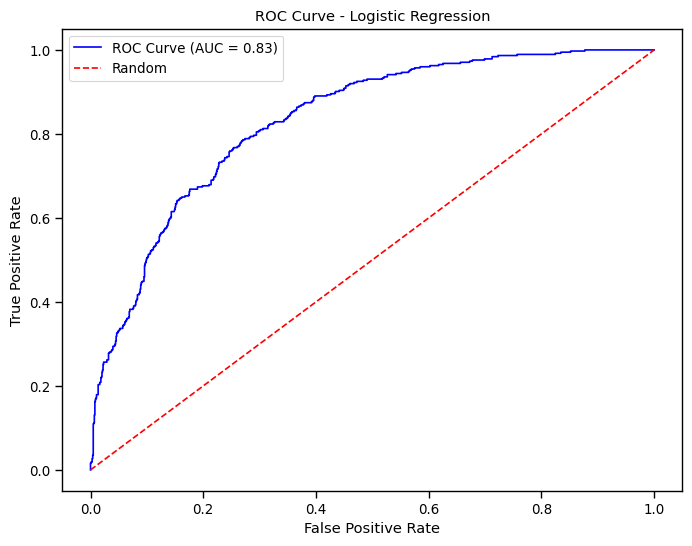

In [104]:
# Calculate ROC AUC
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 

### 

### Random Forest Model

In [105]:
random_forest = RandomForestClassifier()

# Train and evaluate Random Forest Model
random_forest.fit(X_train_k_best, y_train_smote)
y_pred_rf = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train_smote, y_pred_train_rf)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.9984261501210654
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



<Figure size 640x480 with 0 Axes>

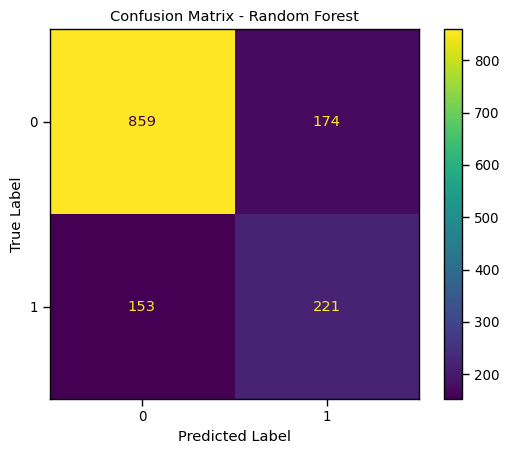

In [106]:
# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

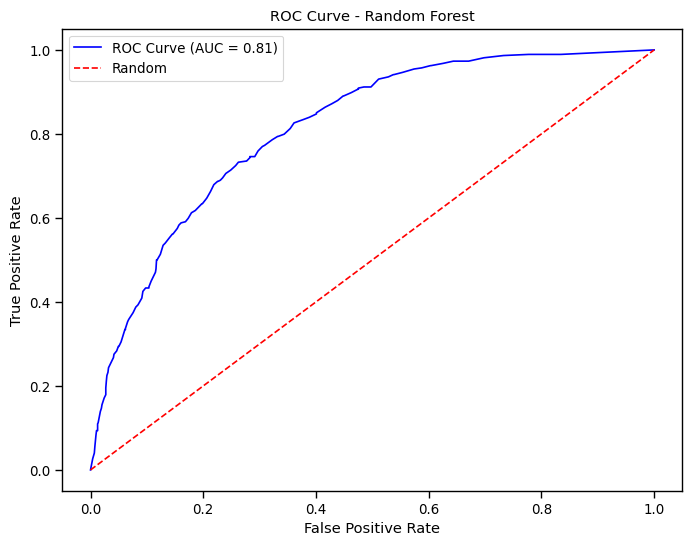

In [107]:
# Calculate ROC AUC
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### 

### 

### SVM Model

In [108]:
svm_model = SVC()

# Train and evaluate svm model
svm_model.fit(X_train_k_best, y_train_smote)
y_pred_svm = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train_smote, y_pred_train_svm)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy on the train set with SMOTE data and top features: 0.8426150121065376
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



<Figure size 640x480 with 0 Axes>

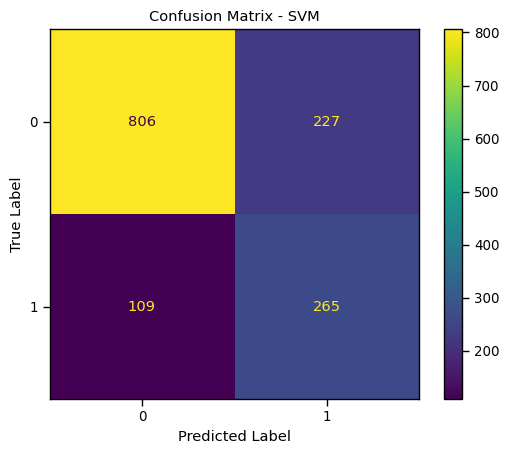

In [109]:
# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

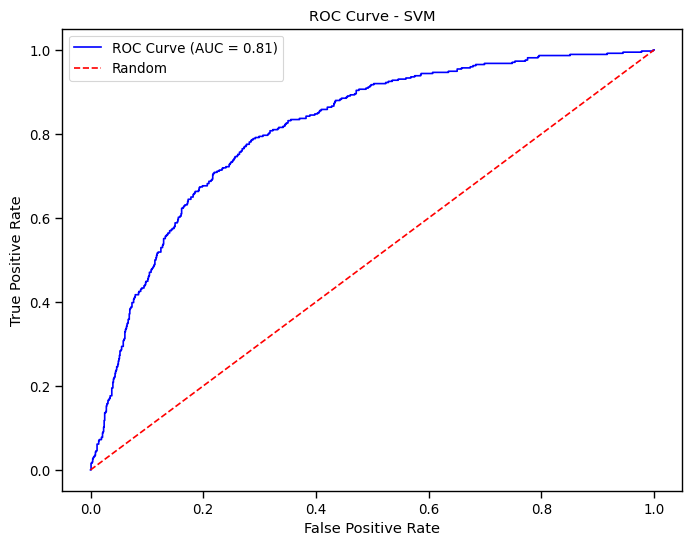

In [110]:
# Calculate ROC AUC
# Note: SVM does not have predict_proba method, so we'll use decision_function instead
y_score_svm = svm_model.decision_function(X_test_k_best)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### 

## EXPERIMENT 6

### Using SMOTE Technique On All Features

In [111]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

### Logistic Regression Model

In [112]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model with SMOTE data
logistic_regression.fit(X_train_smote, y_train_smote)
y_pred_lr = logistic_regression.predict(X_test_normalized)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Make predictions on the train set
y_pred_train_lr = logistic_regression.predict(X_train_smote)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr = accuracy_score(y_train_smote, y_pred_train_lr)
print("Logistic Regression Accuracy on the train set with SMOTE data:", train_accuracy_lr)

# Print accuracy and classification report
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy on the train set with SMOTE data: 0.7730024213075061
Logistic Regression Accuracy: 0.7434257285003554
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



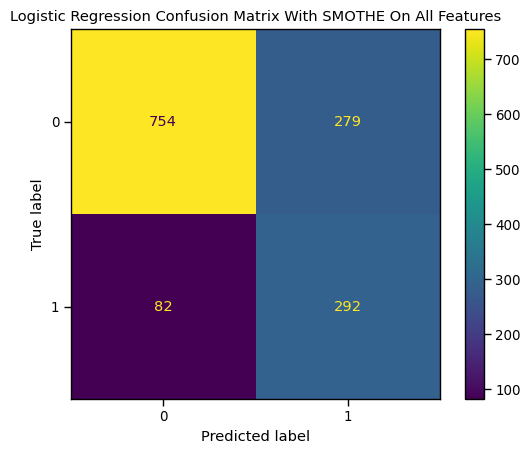

In [113]:
# Plot Confusion Matrix
cm_display_lr = ConfusionMatrixDisplay(conf_matrix_lr).plot()
plt.title("Logistic Regression Confusion Matrix With SMOTHE On All Features")
plt.show()

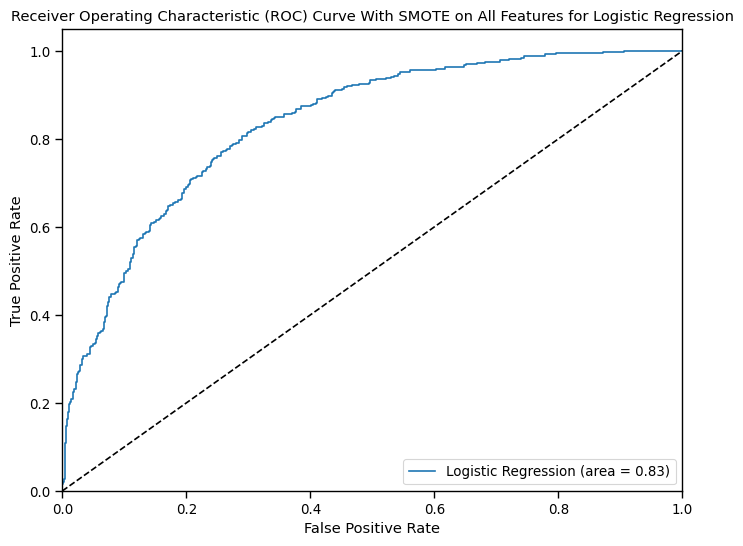

In [114]:
# Calculate predicted probabilities
y_prob_lr = logistic_regression.predict_proba(X_test_normalized)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

# Calculate AUC score
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve With SMOTE on All Features for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#### 

### 

### Random Forest Model

In [115]:
#Initialize Model
random_forest = RandomForestClassifier()

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

In [116]:
# Build and train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf = random_forest.predict(X_test_normalized)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_smote)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train_smote, y_pred_train_rf)
print("Random Forest Accuracy on the train set with SMOTE data:", train_accuracy_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on the train set with SMOTE data: 0.9984261501210654
Random Forest Accuracy: 0.7626154939587776
Random Forest Confusion Matrix:
[[857 176]
 [158 216]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.58      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.76      0.76      1407



<Figure size 800x600 with 0 Axes>

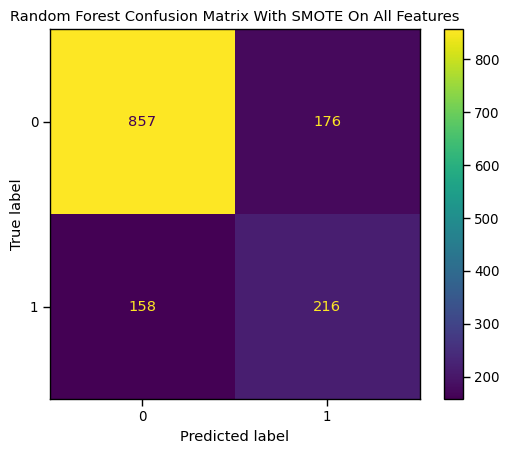

In [117]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
cm_display_rf.plot()
plt.title("Random Forest Confusion Matrix With SMOTE On All Features")
plt.show()

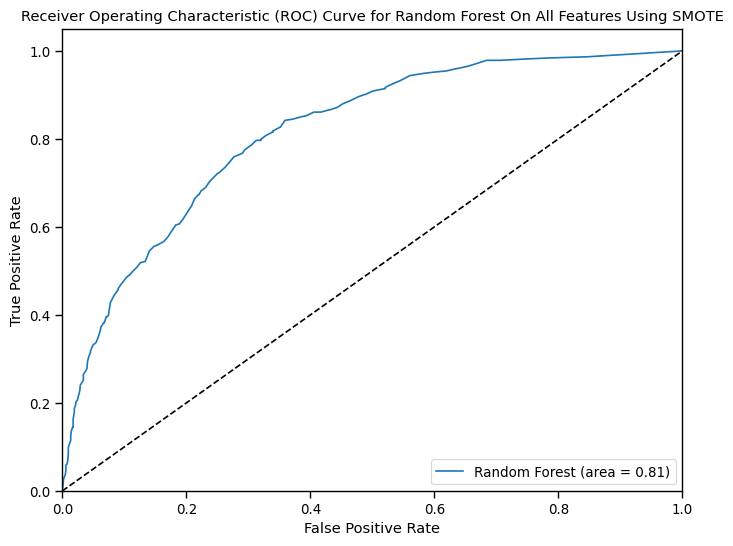

In [118]:
# Calculate AUC ROC for Random Forest
y_prob_rf = random_forest.predict_proba(X_test_normalized)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest On All Features Using SMOTE')
plt.legend(loc="lower right")
plt.show()

### 

### 

### SVM Model

In [119]:
# Initialize SVM model with probability estimates enabled
svm_model = SVC(probability=True)

In [120]:
# Train the SVM model on all features
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_svm = svm_model.predict(X_test_normalized)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_smote)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train_smote, y_pred_train_svm)
print("SVM Accuracy on the train set with SMOTE data:", train_accuracy_svm)

# Evaluate the model
print("Scenario: SVM with SMOTE")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy on the train set with SMOTE data: 0.8504842615012107
Scenario: SVM with SMOTE
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407

Confusion Matrix:
[[802 231]
 [106 268]]


<Figure size 640x480 with 0 Axes>

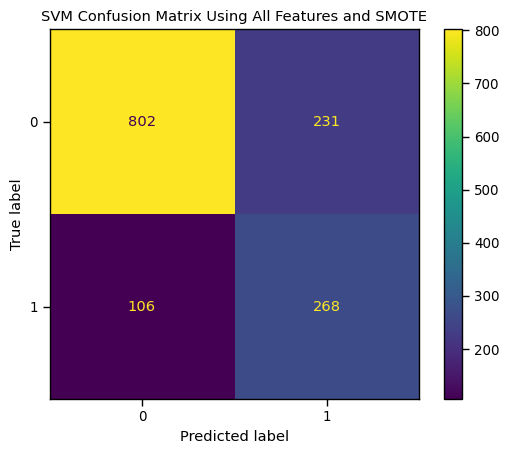

In [121]:
# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm), display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("SVM Confusion Matrix Using All Features and SMOTE")
plt.show()

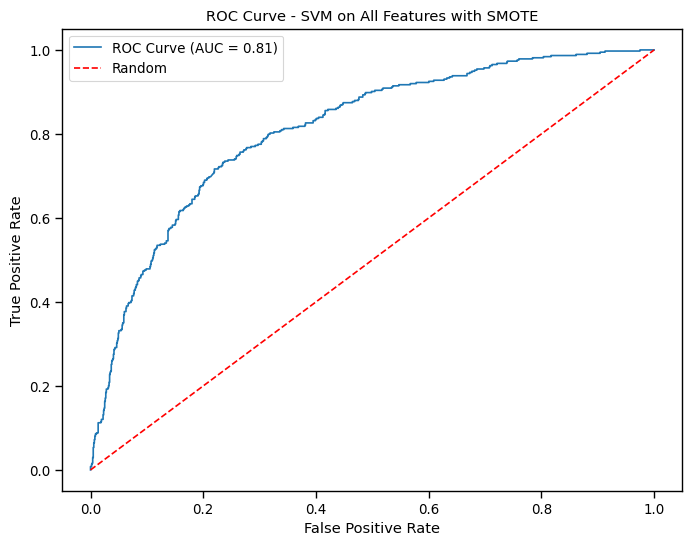

In [122]:
# Get the predicted probabilities for the positive class
y_prob_svm = svm_model.predict_proba(X_test_normalized)[:, 1]

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Compute AUC score
auc = roc_auc_score(y_test, y_prob_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", color="r", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM on All Features with SMOTE")
plt.legend()
plt.show()

### 

### 

### In the next step we will;

- Interpret the model outputs and draw conclusions based on the analysis.
- Communicate findings to stakeholders through reports, visualizations and presentations.
- Deployment of Models
- Outline actionable insights derived from the analysis into decision-making processes.